In [13]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from denn import *
from scipy.stats import kruskal
import scikit_posthocs as sp

In [14]:
path = Path('../../data/results/exp1')

In [15]:
#Experiment = Enum('Experiment', 'exp1 exp2 exp3 exp4')
#Method = Enum('Methods', 'noNNRestart noNNReval NNnorm NNdrop')
#Mechname:Random, Worst, Closest
# fitness plots

case=2

if case==1:
    NNnorm_Worst= pd.read_csv(path/'NNnorm_Worst_mof.csv')
    NNnorm_Random= pd.read_csv(path/'NNnorm_Random_mof.csv')
    NNnorm_Closest= pd.read_csv(path/'NNnorm_Closest_mof.csv')
    
    labels = ['NNnorm_Worst', 'NNnorm_Random', 'NNdrop_Closest']
    x=np.array([ NNnorm_Worst.mof, NNnorm_Random.mof, NNnorm_Closest.mof])
    stat, p = kruskal( NNnorm_Worst,  NNnorm_Random,  NNnorm_Closest)

elif case==2:
    
    NNdrop_Worst = pd.read_csv(path/'NNdrop_Worst_mof.csv')
    NNdrop_Random = pd.read_csv(path/'NNdrop_Random_mof.csv')
    NNdrop_Closest = pd.read_csv(path/'NNdrop_Closest_mof.csv')
    labels = ['NNdrop_Worst', 'NNdrop_Random', 'NNdrop_Closest']
    x=np.array([NNdrop_Worst.mof,NNdrop_Random.mof, NNdrop_Closest.mof])
    stat, p = kruskal(NNdrop_Worst, NNdrop_Random, NNdrop_Closest)



    
    
pc = sp.posthoc_conover(x, p_adjust='holm', val_col='values', group_col='groups')
pc.columns = labels
pc.index = labels
print('Statistics=%.3f, p=%.3f' % (stat, p))
display(pc)

Statistics=9.236, p=0.010


,NNdrop_Worst,NNdrop_Random,NNdrop_Closest
NNdrop_Worst,-1.000000,0.006338,0.171061
NNdrop_Random,0.006338,-1.000000,0.171061
NNdrop_Closest,0.171061,0.171061,-1.000000


/Users/maryam/anaconda3/envs/denn/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


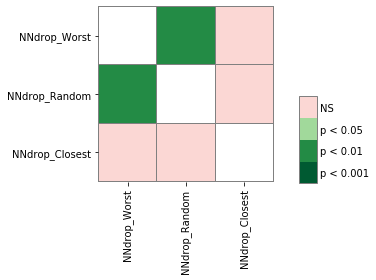

In [16]:
heatmap_args = {'linewidths': 0.25, 'linecolor': '0.5', 'clip_on': False, 'square': True,
                'cbar_ax_bbox': [0.80, 0.35, 0.04, 0.3]}
ax,cbar = sp.sign_plot(pc, **heatmap_args)
ax.set_xticklabels(labels, rotation='vertical')
ax.set_yticklabels(labels, rotation='horizontal')
plt.tight_layout()
plt.savefig(path/'KrusKal-Wallis.eps')